In [1]:
import matplotlib.pyplot as plt

12955
10035


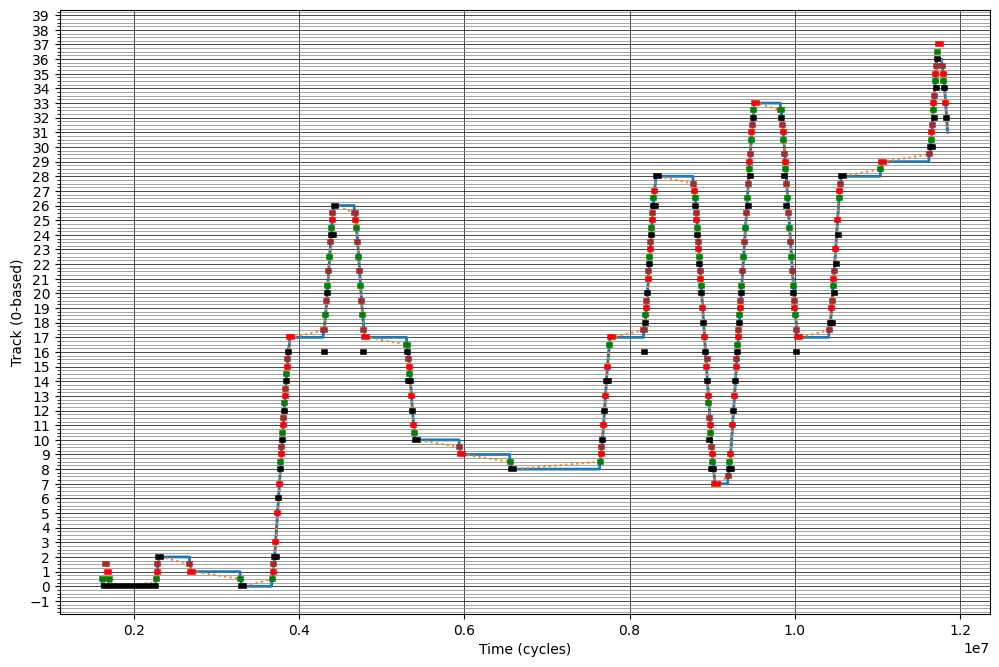

In [105]:
class LogLine:
    def __init__(self, cycle, angle, mag1, mag2, mag3, mag4,
                 elapsed, track, destination_angle):
        self.cycle, self.angle, self.mag1, self.mag2, self.mag3, self.mag4, self.elapsed, self.track, self.destination_angle = \
            int(cycle), float(angle), int(mag1), int(mag2), int(mag3), int(mag4), elapsed, float(track), float(destination_angle)

log = []
with open("../stepper.log") as f:
    for f in f.readlines():
        log.append(LogLine( *f.split(",")))

cycles, angles, dest_angles = [], [], []
cycles_mag1, mag1 = [], []
cycles_mag2, mag2 = [], []
cycles_mag3, mag3 = [], []
cycles_mag4, mag4 = [], []
mag1_current = None


for l in log:
    l: LogLine
    if l.cycle >= 1_600_000 and l.cycle <= 11_850_000:
    #if l.cycle >= 0 and l.cycle <= 250_000:
        cycles.append(l.cycle)
        angles.append(l.angle / 180)
        dest_angles.append(l.destination_angle/180)

        if l.mag1:
            cycles_mag1.append(l.cycle)
            mag1.append(int(l.angle / 360)*2)
        else:
            cycles_mag1.append(l.cycle)
            mag1.append(None)
        if l.mag2:
            cycles_mag2.append(l.cycle)
            mag2.append(0.5 + int(l.angle / 360)*2)
        else:
            cycles_mag2.append(l.cycle)
            mag2.append(None)
        if l.mag3:
            cycles_mag3.append(l.cycle)
            mag3.append(1 + int(l.angle / 360)*2)
        else:
            cycles_mag3.append(l.cycle)
            mag3.append(None)
        if l.mag4:
            cycles_mag4.append(l.cycle)
            mag4.append(1.5 + int(l.angle / 360)*2)
        else:
            cycles_mag4.append(l.cycle)
            mag4.append(None)

print(len(log))
print(len(mag1))
fig, ax = plt.subplots(figsize=(12,8), dpi= 100)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.plot(cycles, angles, linewidth=2)
ax.plot(cycles, dest_angles, linewidth=1.5, linestyle='dotted')


def merge_times(ax, cycles_mag, mag, mag_value, color):
    lines = []
    value = None
    d = list(zip(cycles_mag, mag))
    start = None

    for i, data in enumerate(d):
        cycle, v = data
        if v != value:
            if start is not None:
                if value is not None:
                    lines.append((value, start, cycle))
            start = cycle
            value = v
                
    for v, s,e in lines:
        ax.plot( [s,e], [v,v ], 
                  color=color, linewidth=4)
   

merge_times(ax, cycles_mag1, mag1, 0, "black")
merge_times(ax, cycles_mag2, mag2, 0.5, "green")
merge_times(ax, cycles_mag3, mag3, 1, "red")
merge_times(ax, cycles_mag4, mag4, 1.5, "brown")

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.grid(visible=True, which='major', color="black", linewidth=0.5)
ax.grid(visible=True, which='minor', color="grey", linewidth=0.5)
ax.set_xlabel("Time (cycles)")
ax.set_ylabel("Track (0-based)")
plt.show()
